In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

2025-07-17 17:22:33.396670: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752772953.617162      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752772953.687492      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


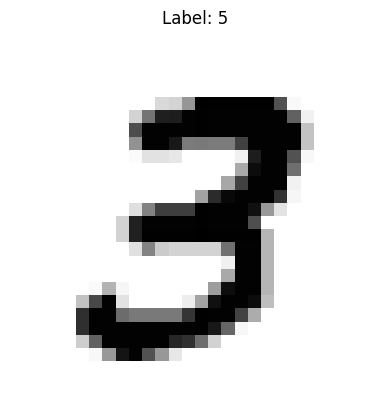

In [3]:
plt.imshow(x_train[7], cmap="binary")
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

In [4]:
# building the structure
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), padding="valid",
                           activation='relu',input_shape=(28, 28, 1)),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding="valid"),


    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), padding="valid",
                           activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding="valid"),


    tf.keras.layers.Conv2D(filters=120, kernel_size=(5, 5), padding="same",
                           activation='relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(
        84, kernel_initializer="he_normal", activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-17 17:22:53.147428: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.7986 - loss: 0.6438 - val_accuracy: 0.9705 - val_loss: 0.0975
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9700 - loss: 0.0993 - val_accuracy: 0.9798 - val_loss: 0.0654
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9800 - loss: 0.0668 - val_accuracy: 0.9837 - val_loss: 0.0488
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9848 - loss: 0.0480 - val_accuracy: 0.9861 - val_loss: 0.0423
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9875 - loss: 0.0403 - val_accuracy: 0.9876 - val_loss: 0.0371
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9906 - loss: 0.0308 - val_accuracy: 0.9883 - val_loss: 0.0342
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9927 - loss: 0.0234 - val_accuracy: 0.9883 - val_loss: 0.0383
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9928 - loss: 0.0229 - 